<a href="https://colab.research.google.com/github/raihan-rizky/rasaku-app/blob/machine-learning/Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

zip_file_path = "/content/sample_data.zip"
extracted_folder_path = "/content/data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

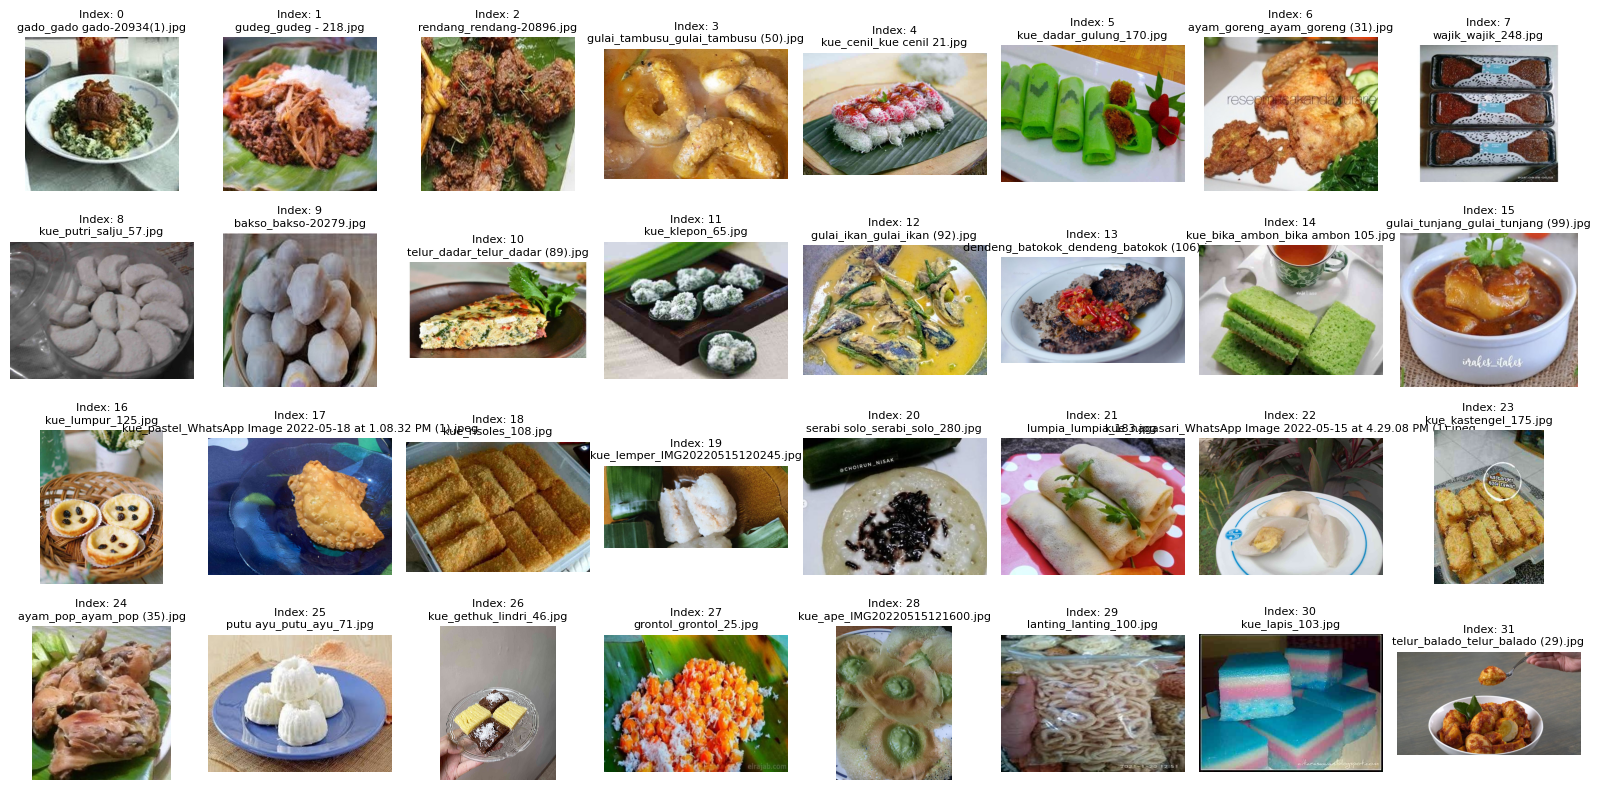

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = "/content/data/sample_dataset"

files = os.listdir(folder_path)
image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))]

#plot
num_rows = 4
num_cols = 8
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j

        if index < len(image_files):
            file_name = image_files[index]
            file_path = os.path.join(folder_path, file_name)

            #show img
            img = Image.open(file_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Index: {index}\n{file_name}", fontsize=8)

plt.tight_layout()
plt.show()

## **Model With Mobilenet V2 and CNN**

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics.pairwise import cosine_similarity

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu')

])

#feature
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array)

    features = features.flatten() #flatten

    return features

folder_path = "/content/data/sample_dataset"
file_names = os.listdir(folder_path)
image_paths = [os.path.join(folder_path, file) for file in file_names if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

#feature extraction process
image_features = [extract_features(path) for path in image_paths]
image_features = np.array(image_features)

#cosine similarity between images
similarities = cosine_similarity(image_features, image_features)

#get recommendation
def recommend(image_index, k=3):
    similar_images = np.argsort(similarities[image_index])[::-1][1:k+1]
    return similar_images

recommendations = recommend(0)
print("Recommendation With Similar Food:", recommendations)

1/1 [==============================] - 0s 300ms/step
Recommendation With Similar Food: [26 11 15]


In [4]:
model.save("model_recsys.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
